In [1]:
# import system libs
import os
import itertools
from PIL import Image

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

print ('modules loaded')

modules loaded


In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# **Data Preprocessing**

* #  **Read data and store it in dataframe**

In [3]:
# Generate data paths with labels
train_data_dir = '/content/Training'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# print(labels)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)

In [4]:
train_df

,filepaths,labels
0,/content/Training/meningioma/Tr-me_1331.jpg,meningioma
1,/content/Training/meningioma/Tr-me_0692.jpg,meningioma
2,/content/Training/meningioma/Tr-me_0978.jpg,meningioma
3,/content/Training/meningioma/Tr-me_1294.jpg,meningioma
4,/content/Training/meningioma/Tr-me_1171.jpg,meningioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_1273.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0233.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0106.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0396.jpg,pituitary


In [5]:
# Generate data paths with labels
test_data_dir = '/content/Testing'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [6]:
ts_df

,filepaths,labels
0,/content/Testing/meningioma/Te-me_0293.jpg,meningioma
1,/content/Testing/meningioma/Te-me_0172.jpg,meningioma
2,/content/Testing/meningioma/Te-me_0232.jpg,meningioma
3,/content/Testing/meningioma/Te-me_0119.jpg,meningioma
4,/content/Testing/meningioma/Te-me_0113.jpg,meningioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0168.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0069.jpg,pituitary
1308,/content/Testing/pituitary/Te-piTr_0006.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0013.jpg,pituitary


* #  **Split dataframe into train, valid, and test**

In [7]:
# valid and test dataframe
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [8]:
test_df

,filepaths,labels
569,/content/Testing/glioma/Te-gl_0192.jpg,glioma
822,/content/Testing/notumor/Te-no_0103.jpg,notumor
1056,/content/Testing/pituitary/Te-pi_0160.jpg,pituitary
84,/content/Testing/meningioma/Te-meTr_0002.jpg,meningioma
560,/content/Testing/glioma/Te-gl_0022.jpg,glioma
...,...,...
692,/content/Testing/notumor/Te-no_0095.jpg,notumor
1032,/content/Testing/pituitary/Te-pi_0232.jpg,pituitary
1044,/content/Testing/pituitary/Te-pi_0051.jpg,pituitary
237,/content/Testing/meningioma/Te-me_0052.jpg,meningioma


* #  **create image data generator**

In [9]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


* # **Show sample from train data**

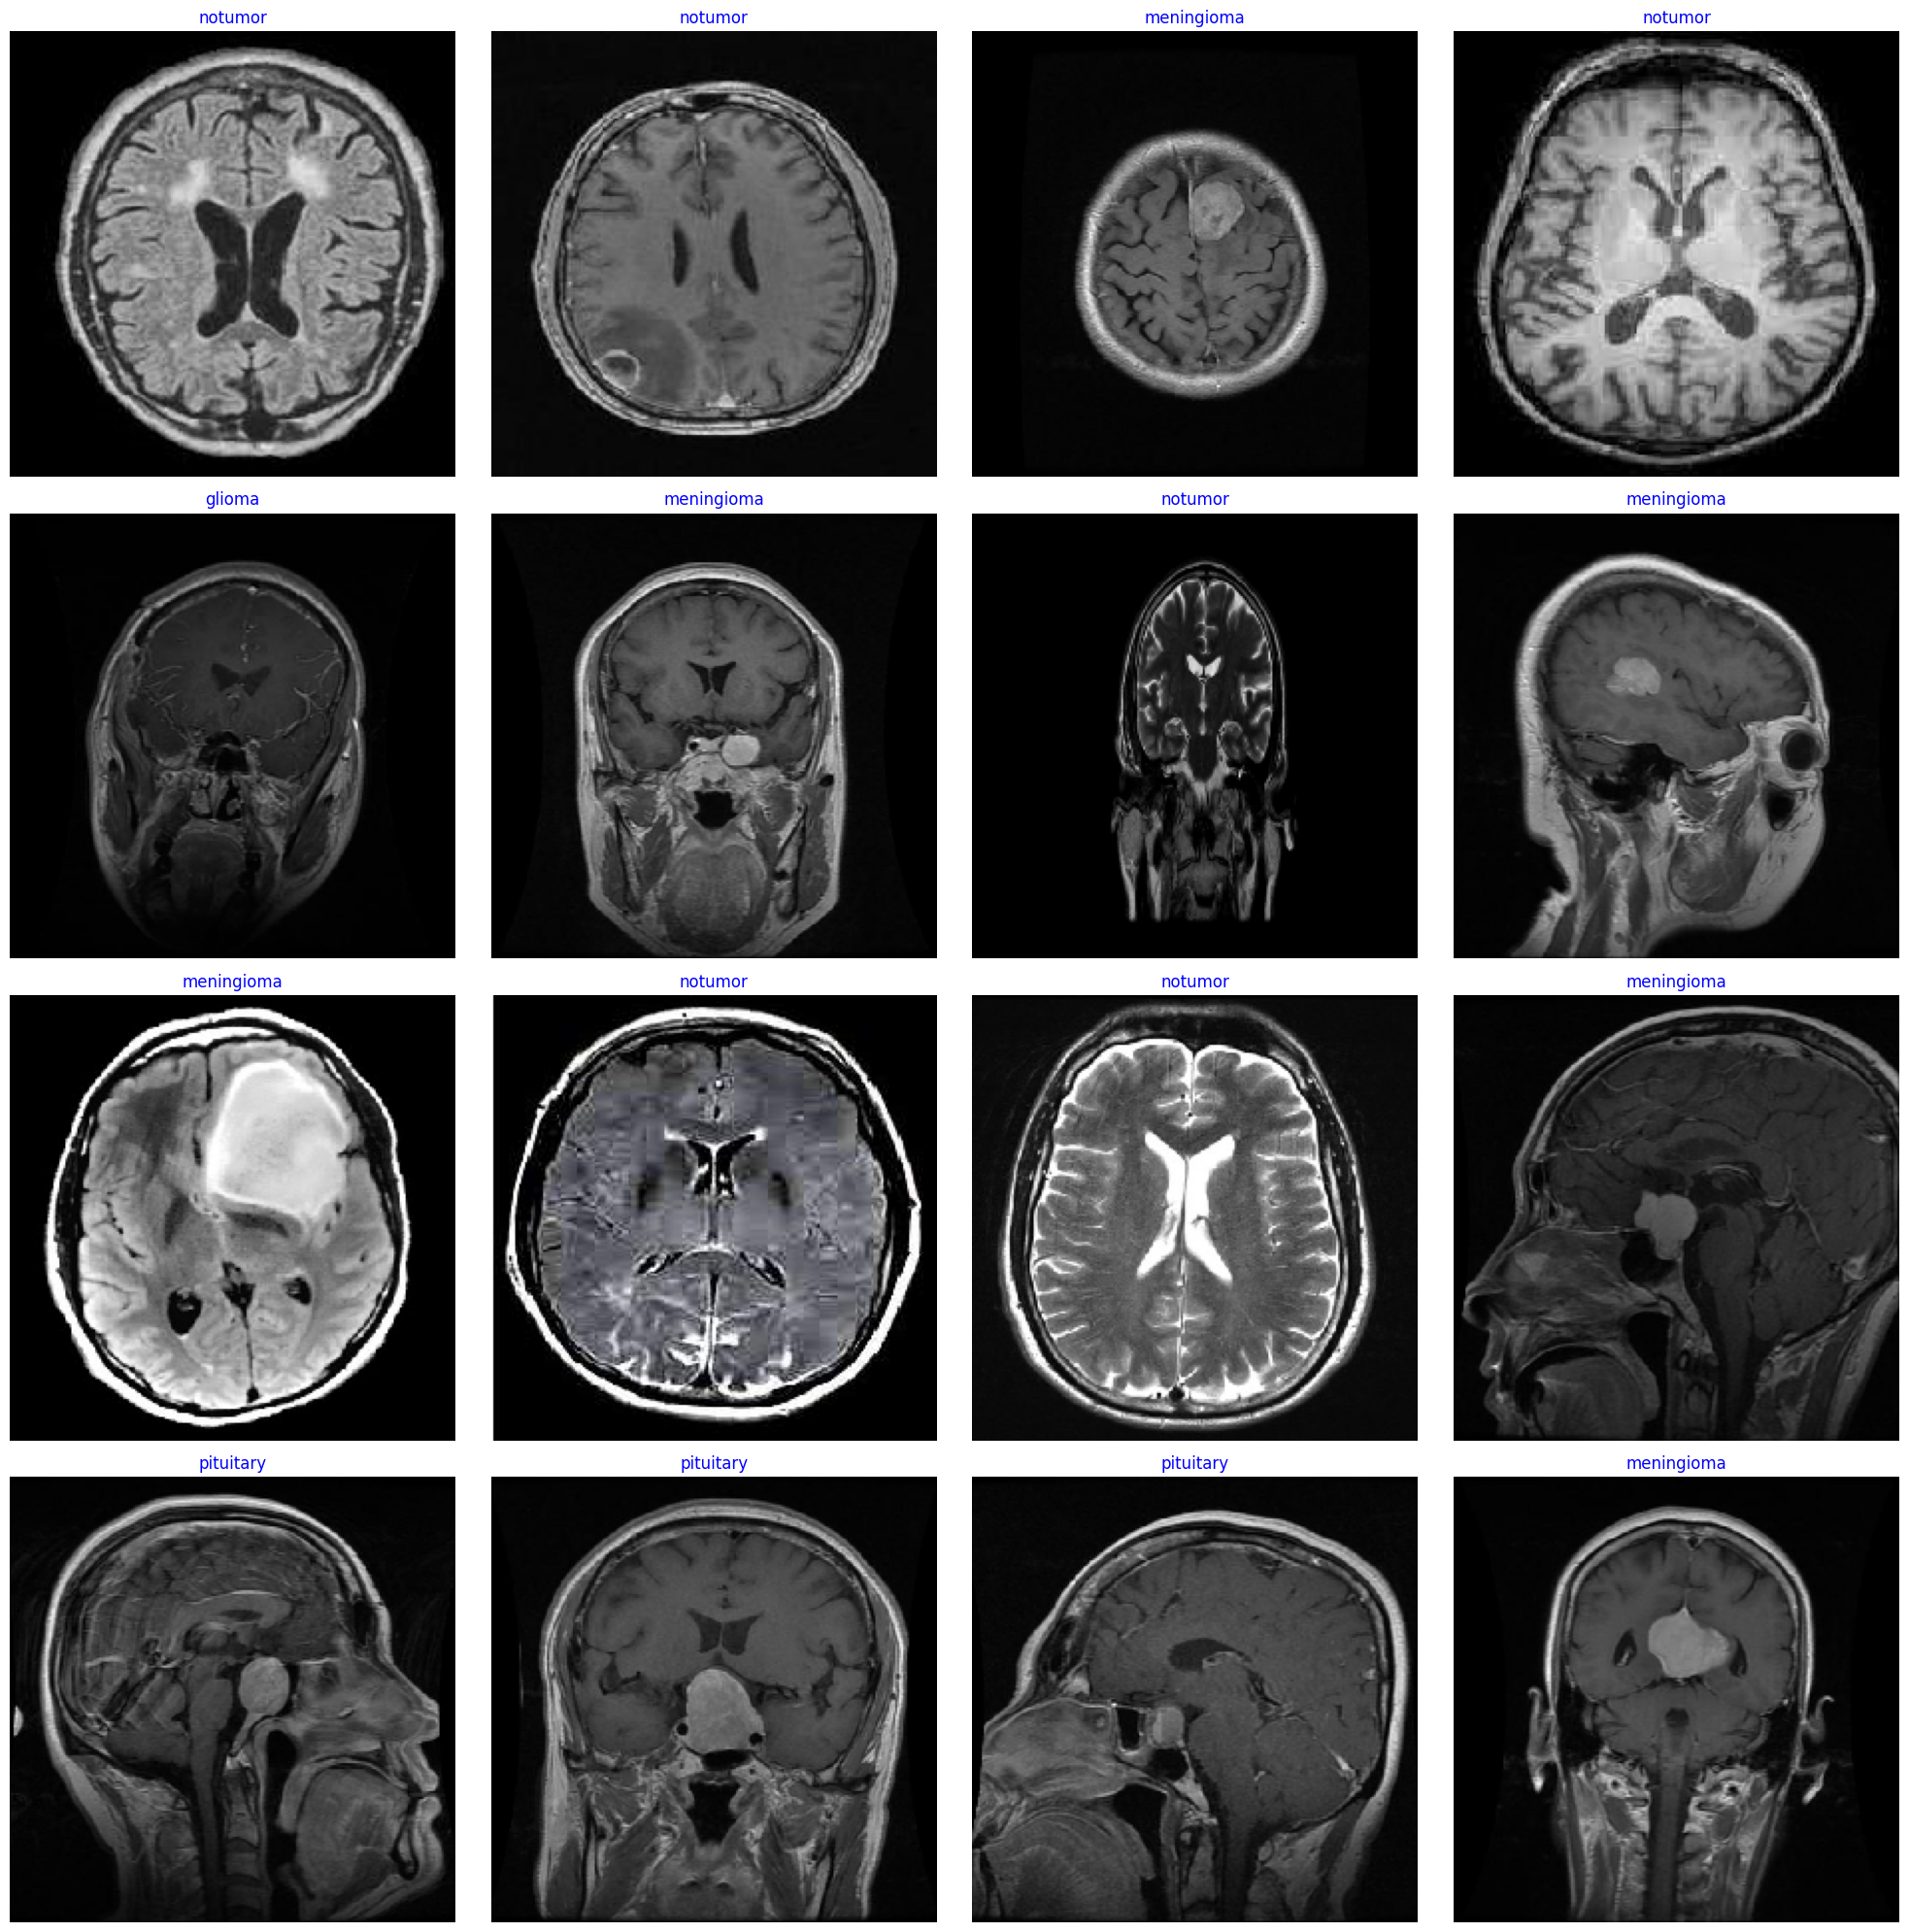

In [10]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adamax

# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1), input_shape= img_shape),
    Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation=LeakyReLU(alpha=0.1)),
    Dense(256, activation=LeakyReLU(alpha=0.1)),
    Dense(class_count, activation='softmax')
])

model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                   

In [12]:
epochs = 50

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/50
357/357 [==============================] - 33s 64ms/step - loss: 0.9668 - accuracy: 0.5812 - val_loss: 0.8185 - val_accuracy: 0.6809
Epoch 2/50
357/357 [==============================] - 21s 58ms/step - loss: 0.5010 - accuracy: 0.7955 - val_loss: 0.5405 - val_accuracy: 0.7802
Epoch 3/50
357/357 [==============================] - 22s 62ms/step - loss: 0.3709 - accuracy: 0.8606 - val_loss: 0.4453 - val_accuracy: 0.8290
Epoch 4/50
357/357 [==============================] - 21s 60ms/step - loss: 0.2823 - accuracy: 0.8992 - val_loss: 0.3539 - val_accuracy: 0.8611
Epoch 5/50
357/357 [==============================] - 23s 65ms/step - loss: 0.2163 - accuracy: 0.9188 - val_loss: 0.3237 - val_accuracy: 0.8687
Epoch 6/50
357/357 [==============================] - 23s 63ms/step - loss: 0.1964 - accuracy: 0.9296 - val_loss: 0.2122 - val_accuracy: 0.9145
Epoch 7/50
357/357 [==============================] - 25s 71ms/step - loss: 0.1523 - accuracy: 0.9412 - val_loss: 0.2385 - val_accuracy:

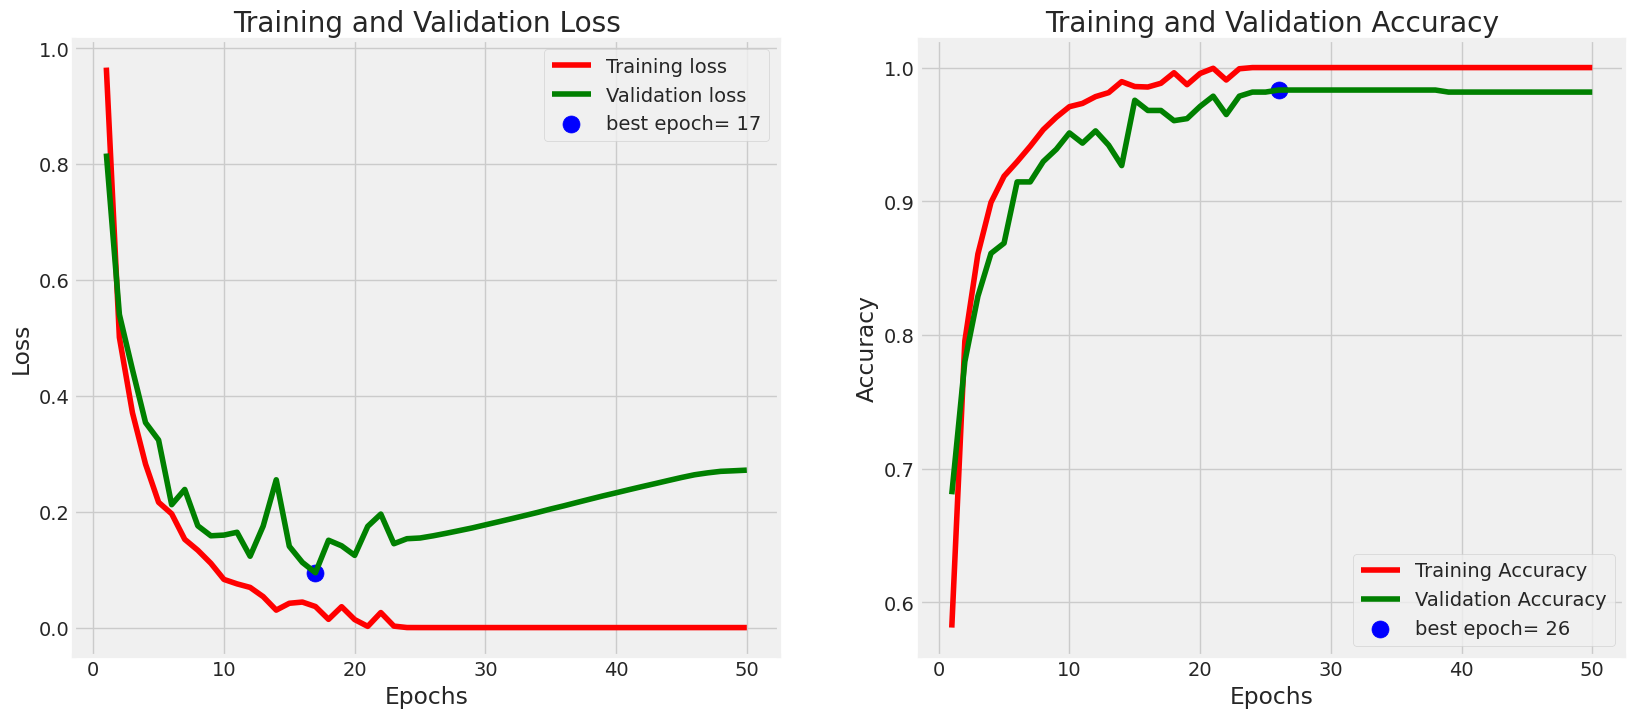

In [13]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [14]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 2s 36ms/step - loss: 0.4324 - accuracy: 0.9619
Train Loss:  3.130495862535554e-10
Train Accuracy:  1.0
--------------------
Validation Loss:  0.27182483673095703
Validation Accuracy:  0.981679379940033
--------------------
Test Loss:  0.4323851466178894
Test Accuracy:  0.9618902206420898


In [15]:
preds = model.predict_generator(test_gen)    # [[0.001, 0.97, 0.01, 0.009], [], [], ]
y_pred = np.argmax(preds, axis=1)            # [1, 2, 0, 2, 3]

<ipython-input-15-887d12cd4a87>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)    # [[0.001, 0.97, 0.01, 0.009], [], [], ]


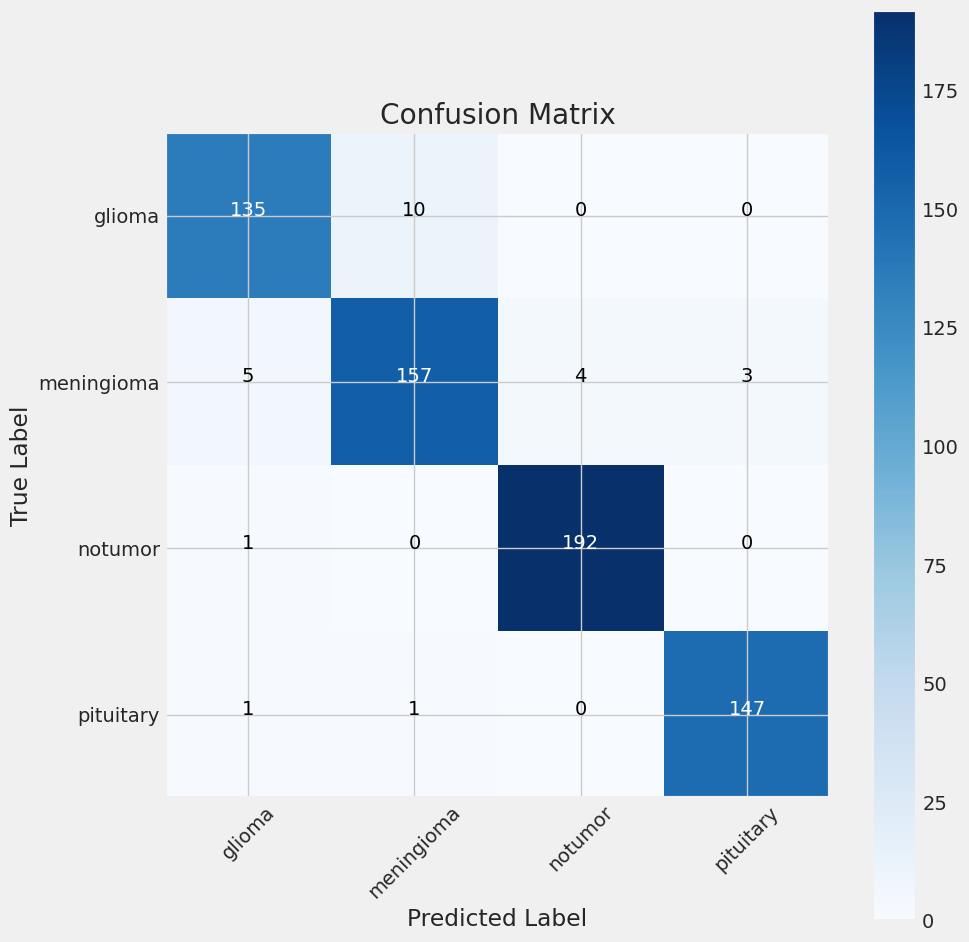

In [16]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [17]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.95      0.93      0.94       145
  meningioma       0.93      0.93      0.93       169
     notumor       0.98      0.99      0.99       193
   pituitary       0.98      0.99      0.98       149

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



In [ ]:
#Save the model
model.save('Brain Tumors.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('/kaggle/working/Brain Tumors.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
image_path = '/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(1).jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
print(f"{class_labels[np.argmax(predictions)]}")

1/1 [==============================] - 0s 398ms/step
Pituitary
